Data Loading

In [15]:
import pandas as pd

full_data = pd.read_csv("C:/Users/THAMEEM ANSAR/Downloads/Customer Churn Analysis/Data/Telco-Customer-Churn.csv")

In [16]:
pd.set_option('display.max_columns', 0)
full_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [17]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [18]:
print(full_data.columns)


Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


In [19]:
full_data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [20]:
full_data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

Data Cleaning 

In [21]:
clean_data = full_data.drop(['customerID','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup','DeviceProtection','StreamingTV','StreamingMovies'], axis=1)

Check for NaN Values

In [22]:
clean_data.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
tenure              0
InternetService     0
TechSupport         0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [23]:
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   tenure            7043 non-null   int64  
 4   InternetService   7043 non-null   object 
 5   TechSupport       7043 non-null   object 
 6   Contract          7043 non-null   object 
 7   PaperlessBilling  7043 non-null   object 
 8   PaymentMethod     7043 non-null   object 
 9   MonthlyCharges    7043 non-null   float64
 10  TotalCharges      7043 non-null   object 
 11  Churn             7043 non-null   object 
dtypes: float64(1), int64(2), object(9)
memory usage: 660.4+ KB


In [ ]:
# Step 2: Check how many 'TotalCharges' entries are invalid (blank strings)
invalid_rows = full_data[full_data['TotalCharges'].str.strip() == ' ']
print("Invalid rows in TotalCharges:", len(invalid_rows))  # Should be 11

# Step 3: Convert 'TotalCharges' to numeric (invalid blanks will become NaN)
full_data['TotalCharges'] = pd.to_numeric(full_data['TotalCharges'], errors='coerce')

# Step 4: Drop rows with missing 'TotalCharges'
full_data.dropna(subset=['TotalCharges'], inplace=True)

# Step 5: Reset index for cleanliness
full_data.reset_index(drop=True, inplace=True)

# Step 6: Confirm new shape
print("Final cleaned shape:", full_data.shape)  # Should be (7032, 21)


Invalid rows in TotalCharges: 0
Final cleaned shape: (7032, 21)


In [25]:

# Copy the original data to keep it safe
eda_data = full_data.copy()

# Identify categorical columns
cat_list = [col for col in eda_data.columns if eda_data[col].dtype == 'object']

# Create a mapping dataframe
cat_map = pd.DataFrame(columns=['variable', 'old_val', 'new_val'])

# Replace each categorical value with a unique number and store the mapping
for cat in cat_list:
    cat_val = pd.Series(eda_data[cat].unique())
    for _val in range(len(cat_val)):
        cat_dict = pd.Series({
            'variable': cat,
            'old_val': cat_val[_val],
            'new_val': _val
        })
        cat_map = pd.concat([cat_map, cat_dict.to_frame().T], ignore_index=True)
        eda_data[cat] = eda_data[cat].replace(cat_val[_val], _val)

# Optional: Set index for easy lookup
cat_map.set_index(['variable', 'new_val'], inplace=True)

# Now eda_data is fully numeric for plotting


C:\Users\THAMEEM ANSAR\AppData\Local\Temp\ipykernel_23868\3094759987.py:20: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  eda_data[cat] = eda_data[cat].replace(cat_val[_val], _val)
C:\Users\THAMEEM ANSAR\AppData\Local\Temp\ipykernel_23868\3094759987.py:20: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  eda_data[cat] = eda_data[cat].replace(cat_val[_val], _val)
C:\Users\THAMEEM ANSAR\AppData\Local\Temp\ipykernel_23868\3094759987.py:20: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future ver

Correlation Heatmap

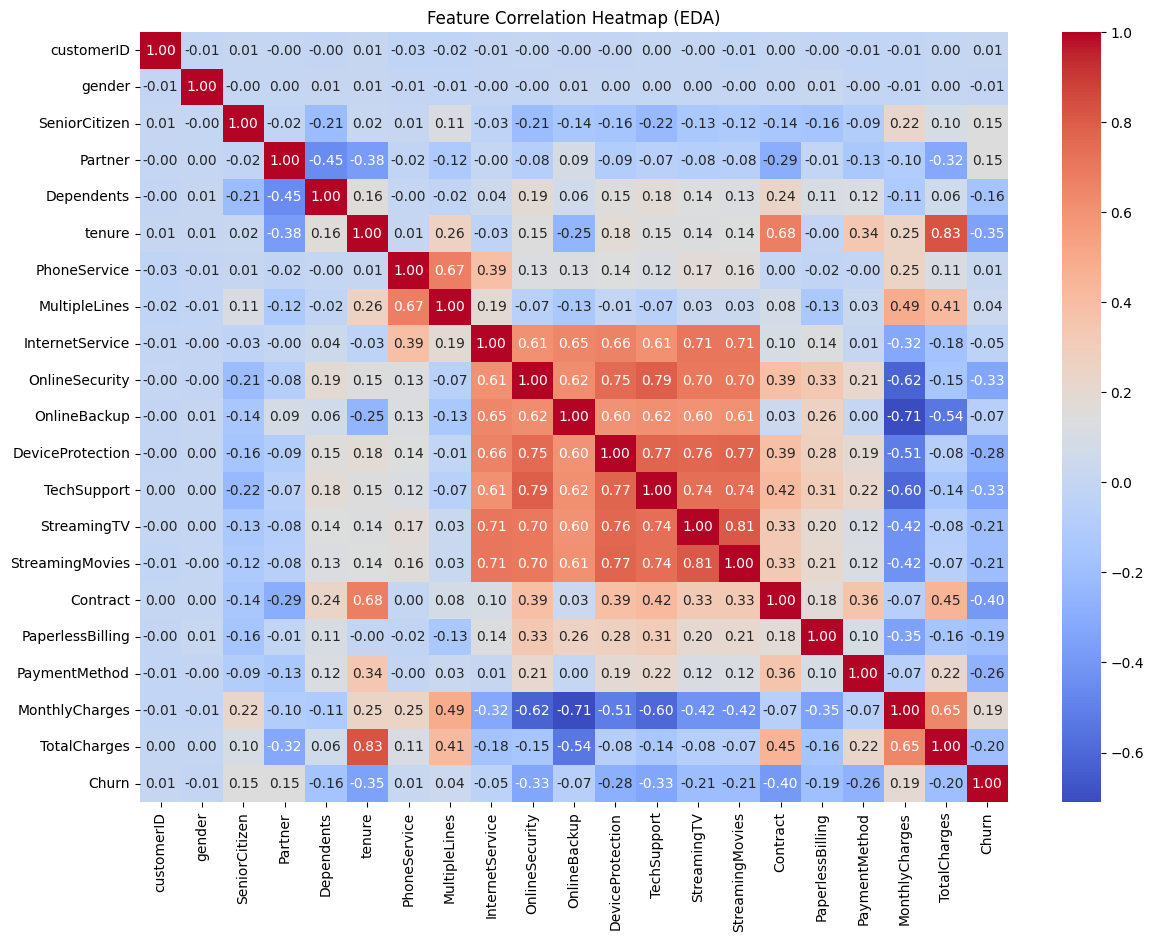

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 10))
sns.heatmap(eda_data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap (EDA)")
plt.show()


In [27]:
# To decode the numeric values
cat_map.loc["InternetService"]


,old_val
new_val,
0,DSL
1,Fiber optic
2,No


In [28]:
X = full_data.drop(['Churn'], axis=1)
y = full_data['Churn']
y.value_counts()

Churn
No     5163
Yes    1869
Name: count, dtype: int64

Data Visualization

 Pie Chart for Churn

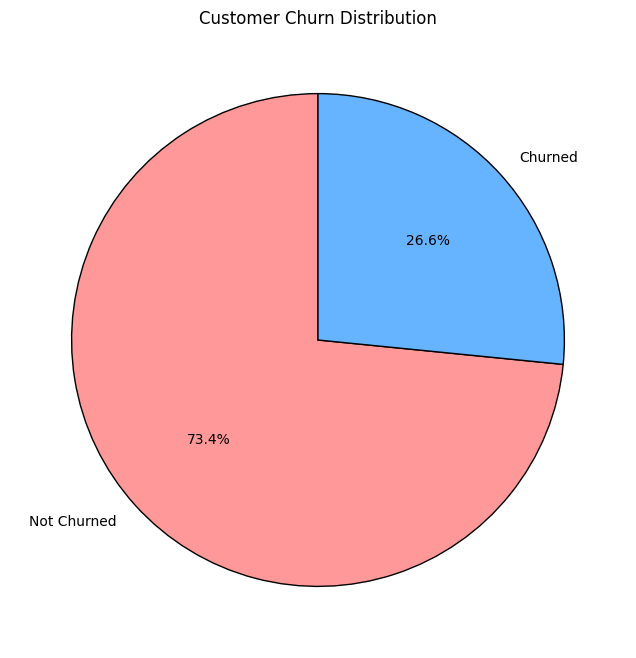

In [29]:
plt.figure(figsize=(8, 8))
full_data['Churn'].value_counts().plot.pie(
    autopct='%1.1f%%',
    startangle=90,
    colors=['#ff9999', '#66b3ff'],
    labels=['Not Churned', 'Churned'],
    wedgeprops={'edgecolor': 'black'}
)
plt.title("Customer Churn Distribution")
plt.ylabel("")

# Save as image (in same directory)
plt.savefig("churn_distribution_pie.png", dpi=300, bbox_inches='tight')
plt.show()


Churn by All Features

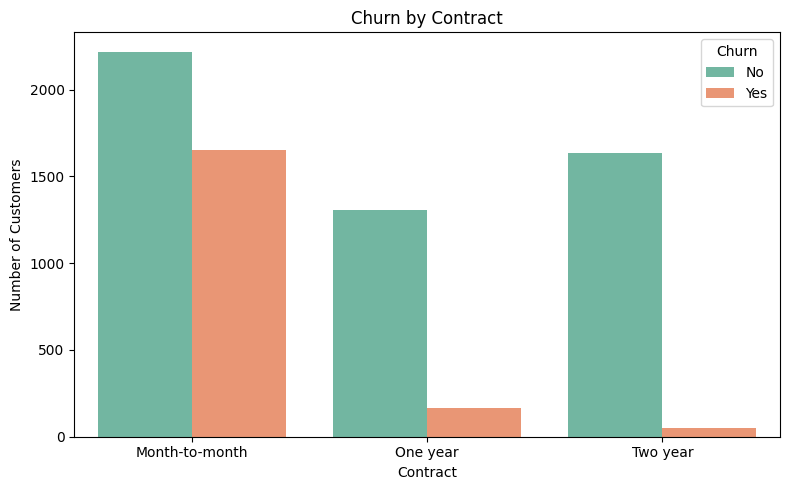

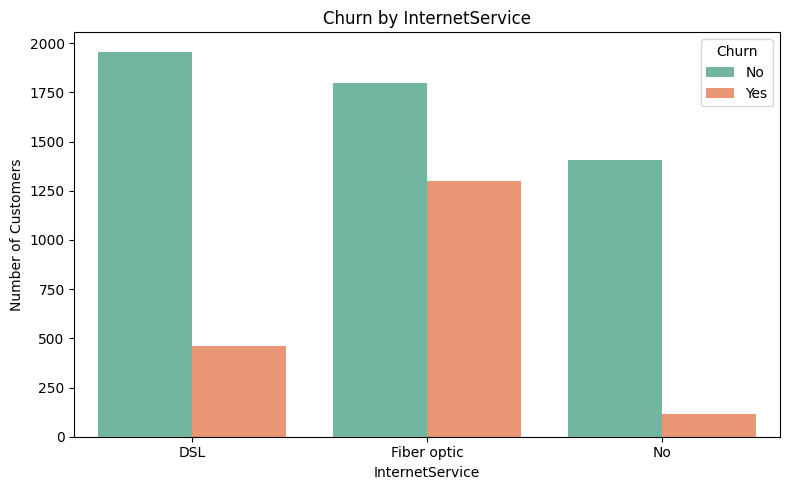

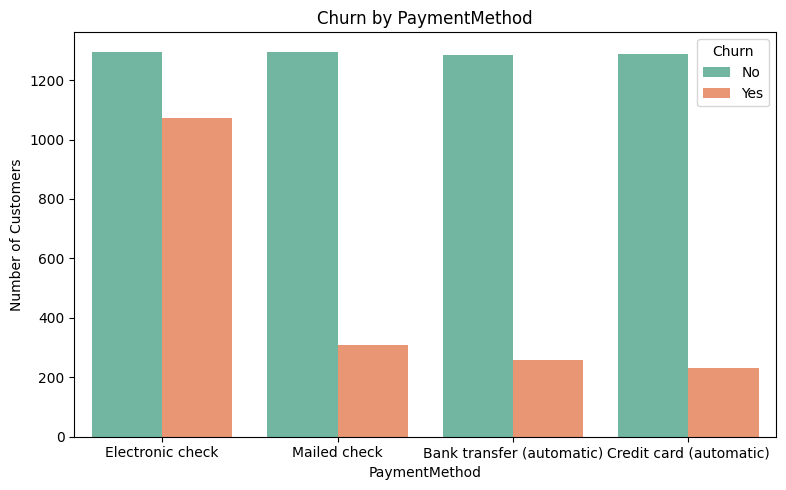

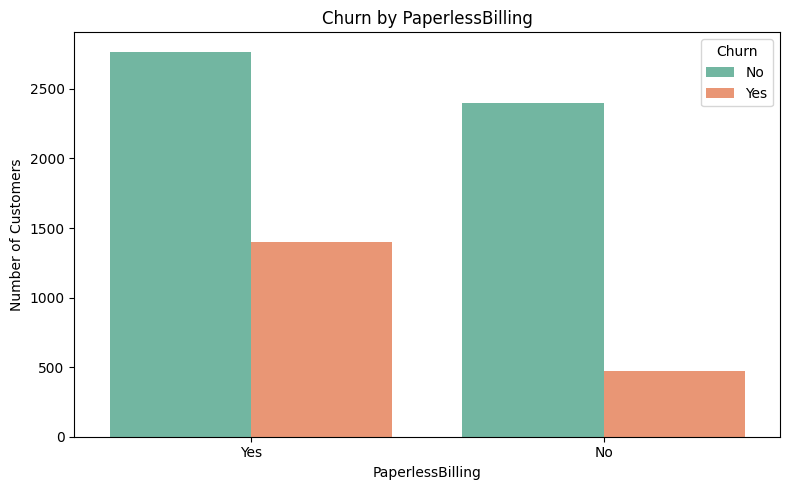

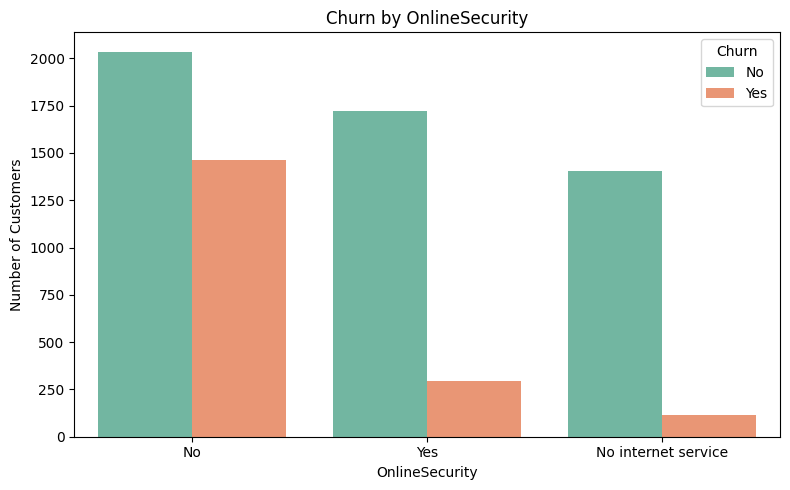

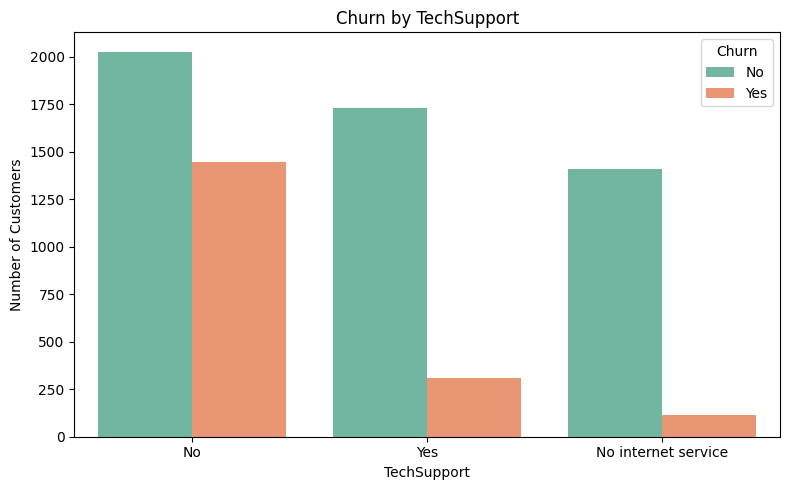

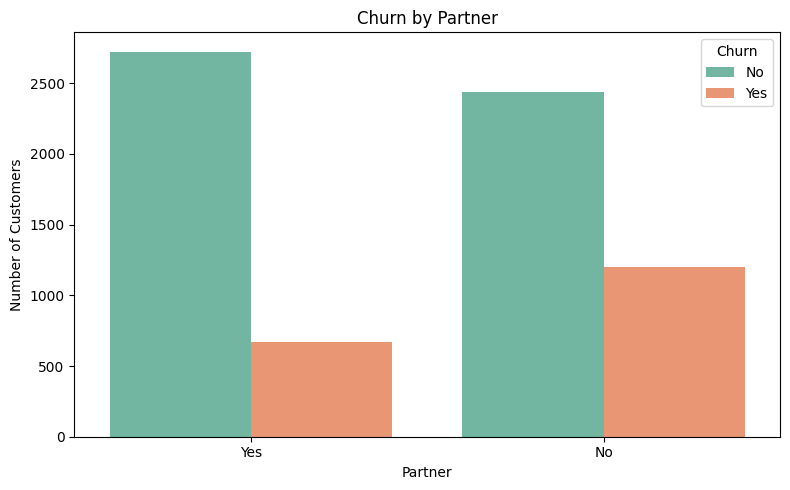

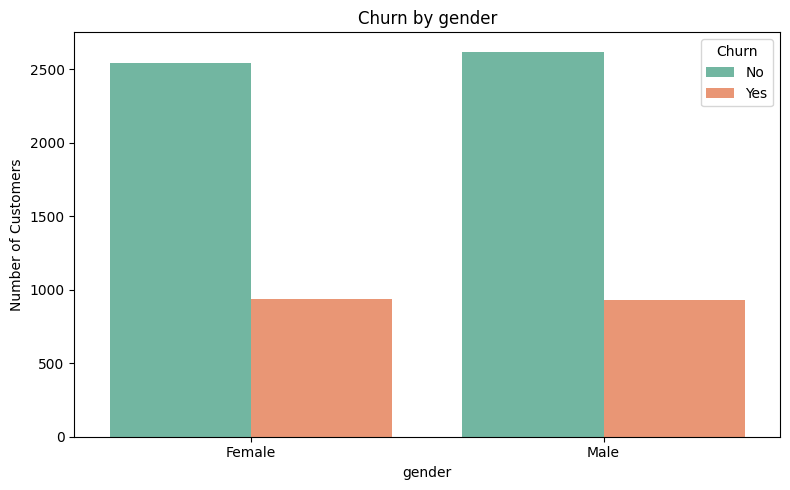

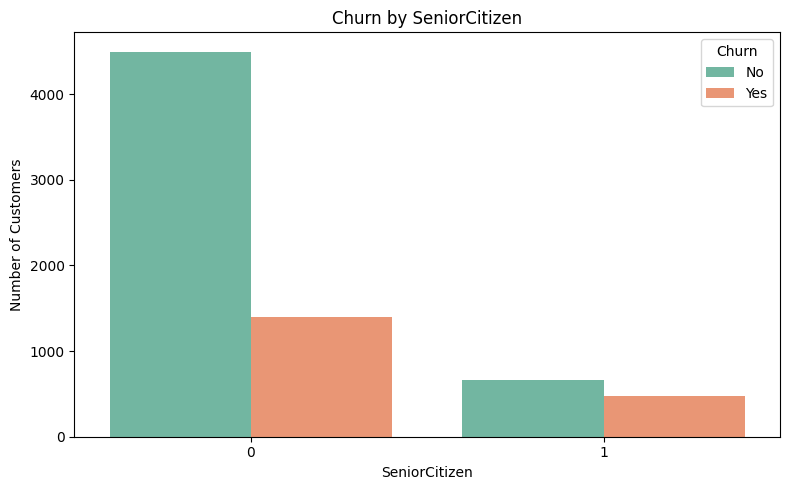

<Figure size 640x480 with 0 Axes>

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

categorical_features = [
    'Contract', 'InternetService', 'PaymentMethod', 'PaperlessBilling',
    'OnlineSecurity', 'TechSupport', 'Partner', 'gender', 'SeniorCitizen'
]

for feature in categorical_features:
    plt.figure(figsize=(8, 5))
    sns.countplot(x=full_data[feature], hue=full_data['Churn'], palette='Set2')
    plt.title(f'Churn by {feature}')
    plt.xlabel(feature)
    plt.ylabel('Number of Customers')
    plt.legend(title='Churn', labels=['No', 'Yes'])
    plt.tight_layout()
    plt.show()

    # Save as image (in same directory)
plt.savefig("churn_distribution.png", dpi=300, bbox_inches='tight')
plt.show()



chi2 score Testing

In [35]:
from sklearn.feature_selection import chi2
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Step 1: Copy the data
chi2_data = full_data.copy()

# Step 2: Encode the target column 'Churn' as binary
chi2_data['Churn'] = LabelEncoder().fit_transform(chi2_data['Churn'])

# Step 3: Separate features (X) and target (y)
X = chi2_data.drop('Churn', axis=1)
y = chi2_data['Churn']

# Step 4: One-hot encode categorical features
X_encoded = pd.get_dummies(X, drop_first=True)

# Step 5: Apply chi2 test
chi2_scores, p_values = chi2(X_encoded, y)

# Step 6: Show results in DataFrame
chi2_results = pd.DataFrame({
    'Feature': X_encoded.columns,
    'Chi2 Score': chi2_scores,
    'p-Value': p_values
}).sort_values(by='Chi2 Score', ascending=False)

# Step 7: Display top 10 important features based on chi2
print("Top 10 Features influencing Churn (Chi2 Test):")
print(chi2_results.head(10))


Top 10 Features influencing Churn (Chi2 Test):
                                   Feature     Chi2 Score        p-Value
3                             TotalCharges  629630.810349   0.000000e+00
1                                   tenure   16377.328093   0.000000e+00
2                           MonthlyCharges    3653.074681   0.000000e+00
7056                     Contract_Two year     486.223101  9.454286e-108
7059        PaymentMethod_Electronic check     424.113152   3.105849e-94
7041           InternetService_Fiber optic     372.082851   6.587130e-83
7049       TechSupport_No internet service     285.475152   4.814000e-64
7047  DeviceProtection_No internet service     285.475152   4.814000e-64
7042                    InternetService_No     285.475152   4.814000e-64
7043    OnlineSecurity_No internet service     285.475152   4.814000e-64


Model Accuracy Comparision and Visualization

C:\Users\THAMEEM ANSAR\AppData\Local\Temp\ipykernel_23868\2255893859.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model_names, y=accuracy_scores, palette='coolwarm')


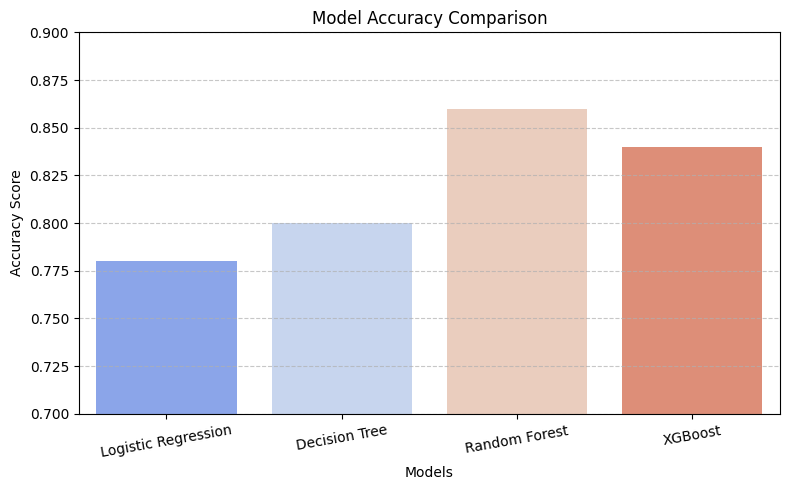

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

# Example model results — replace with your real scores
model_names = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'XGBoost']
accuracy_scores = [0.78, 0.80, 0.86, 0.84]  # Replace with your actual results

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(x=model_names, y=accuracy_scores, palette='coolwarm')

plt.ylim(0.7, 0.9)
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy Score')
plt.xlabel('Models')
plt.xticks(rotation=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


Cross Validation and Visualization

In [37]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
import numpy as np

# Encode target
data = full_data.copy()
data['Churn'] = data['Churn'].map({'Yes': 1, 'No': 0})

# Select only the 12 final features
selected_features = ['Contract', 'TotalCharges', 'MonthlyCharges', 'tenure', 
                     'OnlineSecurity', 'TechSupport', 'PaperlessBilling', 
                     'PaymentMethod', 'Partner', 'InternetService', 'gender', 'SeniorCitizen']

X = pd.get_dummies(data[selected_features], drop_first=True)
y = data['Churn']

# Define models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier()
}

# Collect cross-validation scores
results = {}

for name, model in models.items():
    scores = cross_val_score(model, X, y, cv=5)
    results[name] = {
        'min': np.min(scores),
        '25%': np.percentile(scores, 25),
        '50%': np.median(scores),
        '75%': np.percentile(scores, 75),
        'max': np.max(scores)
    }

# Convert to DataFrame for plotting
acc_comp_df = pd.DataFrame(results).T
print(acc_comp_df)


c:\Users\THAMEEM ANSAR\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\THAMEEM ANSAR\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://sci

                          min       25%       50%       75%       max
Logistic Regression  0.789474  0.798720  0.805259  0.805259  0.806543
Decision Tree        0.711949  0.724751  0.727790  0.736318  0.738265
Random Forest        0.769559  0.784648  0.789623  0.793030  0.794452


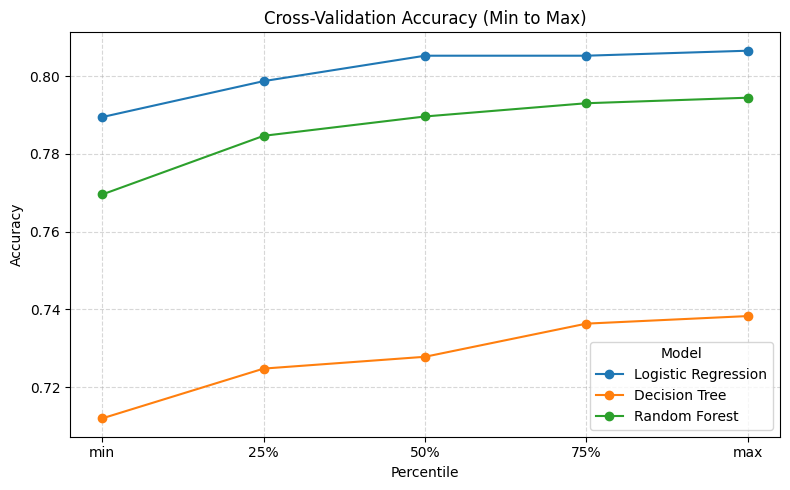

In [38]:
import matplotlib.pyplot as plt

plot_df = acc_comp_df[['min', '25%', '50%', '75%', 'max']]

plt.figure(figsize=(8, 5))
for model_name, row in plot_df.iterrows():
    plt.plot(row.index, row.values, marker='o', label=model_name)

plt.title('Cross-Validation Accuracy (Min to Max)')
plt.xlabel('Percentile')
plt.ylabel('Accuracy')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(title='Model')
plt.tight_layout()
plt.show()


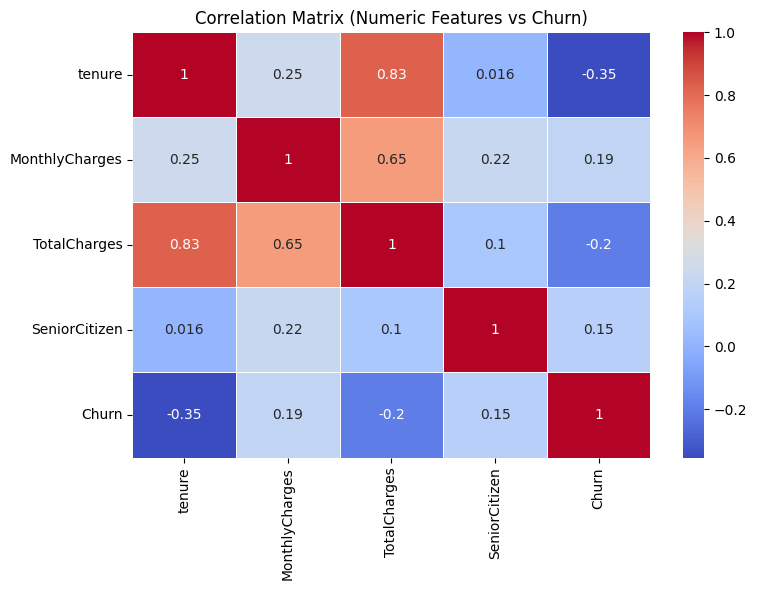

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select numeric features only
numeric_cols = ['tenure', 'MonthlyCharges', 'TotalCharges', 'SeniorCitizen', 'Churn']
corr_data = full_data.copy()
corr_data['Churn'] = corr_data['Churn'].map({'Yes': 1, 'No': 0})

# Compute correlation matrix
corr_matrix = corr_data[numeric_cols].corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix (Numeric Features vs Churn)")
plt.tight_layout()
plt.show()


In [43]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


Final Model Prediction

In [44]:
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
import pandas as pd

# Copy data
df = full_data.copy()
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

# Features and Target
selected_features = ['Contract', 'TotalCharges', 'MonthlyCharges', 'tenure', 
                     'OnlineSecurity', 'TechSupport', 'PaperlessBilling', 
                     'PaymentMethod', 'Partner', 'InternetService', 'gender', 'SeniorCitizen']
X = df[selected_features]
y = df['Churn']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Preprocessing
num_cols = ['TotalCharges', 'MonthlyCharges', 'tenure']
cat_cols = [col for col in X.columns if col not in num_cols]

preprocessor = ColumnTransformer([
    ('num', StandardScaler(), num_cols),
    ('cat', OneHotEncoder(drop='first'), cat_cols)
])

# Apply preprocessing to training data only
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

# Apply SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train_transformed, y_train)

# Train model
model = RandomForestClassifier(random_state=42)
model.fit(X_resampled, y_resampled)

# Predict
y_pred = model.predict(X_test_transformed)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.7626154939587776
              precision    recall  f1-score   support

           0       0.85      0.83      0.84      1033
           1       0.55      0.59      0.57       374

    accuracy                           0.76      1407
   macro avg       0.70      0.71      0.70      1407
weighted avg       0.77      0.76      0.76      1407



In [42]:
# Save the entire pipeline (preprocessing + model)
joblib.dump(pipeline, 'final_pipeline.pkl')

['final_pipeline.pkl']